In [86]:
import cv2 as cv
import numpy as np
import sys
import os
import subprocess

## Compare with OpenCV

In [87]:
def assert_img_equal(filter_img, opencv_img):
    assert filter_img.shape == opencv_img.shape, f"{filter_img.shape} != {opencv_img.shape}"

    difference = cv.subtract(filter_img, opencv_img)
    b, g, r = cv.split(difference)

    assert cv.countNonZero(b) == 0, f"differs by {cv.countNonZero(b)}"
    assert cv.countNonZero(g) == 0, f"differs by {cv.countNonZero(g)}"
    assert cv.countNonZero(r) == 0, f"differs by {cv.countNonZero(r)}"    

In [90]:
def exec_filtering(img_name, algorithm, window_radius):
    filtered = f"img/{img_name}_{algorithm}_{window_radius}.jpg"

    args = ["./Filtering", f"img/{img_name}.jpg", filtered, f"--{algorithm}", f"{window_radius}"]
    subprocess.run(args, shell=False)
    
    return filtered

In [91]:
original = "chinese_keys"
window_radius = 10

for algorithm in ['naive']:#, 'huang', 'fast']:
    print(algorithm)
    filter_img = cv.imread(exec_filtering(original, algorithm, window_radius))
    opencv_img = cv.imread(exec_filtering(original, "opencv", window_radius))

    assert_img_equal(filter_img, opencv_img)

naive


## Performance

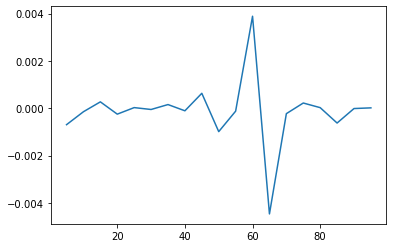

In [96]:
import matplotlib.pyplot as plt
import timeit

timeline = np.arange(5, 100, 5)

times = {}

for algorithm in ['opencv']: #, 'huang', 'fast']:
    times[algorithm] = []
    
    for window_radius in timeline:
        start = timeit.timeit()
        exec_filtering(original, algorithm, window_radius)
        end = timeit.timeit()
        
        times[algorithm].append(end - start)
        
    plt.plot(timeline, times[algorithm])